In [27]:
#Start here and load the dataframe
df = pd.read_csv("dropped_col_df.csv")

In [60]:
df_temp=df.copy()
df_temp = df_temp.groupby(['SEL_IHE']).count().reset_index()

In [61]:
df_temp

,SEL_IHE,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,...,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL
0,1,1137,1137,1137,1137,1137,1137,1137,1137,1137,...,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
1,2,7748,7748,7748,7748,7748,7748,7748,7748,7748,...,7748,7748,7748,7748,7748,7748,7748,7748,7748,7748
2,3,834,834,834,834,834,834,834,834,834,...,834,834,834,834,834,834,834,834,834,834
3,4,2692,2692,2692,2692,2692,2692,2692,2692,2692,...,2692,2692,2692,2692,2692,2692,2692,2692,2692,2692


## Plots ideas

- Distribution of men and women in the dataset. 
- kdkdk
- kdkdk


Different kinds of plots: 
- boxplot
    - 
- lineplot
- histogram
- scatterplot
- 



In [25]:
# df.groupby(df.GENDER, df.ENG_PRO)
df_GENDER_ENG_PRO = df.groupby(by=["GENDER"]).count()
df_GENDER_ENG_PRO

,COD_S11,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,INTERNET,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
GENDER,,,,,,,,,,,,,,,,,,,,,
F,5043,5043,5043,5043,5043,5043,5043,5043,0,5043,...,5043,5043,5043,5043,5043,5043,5043,5043,5043,5043
M,7368,7368,7368,7368,7368,7368,7368,7368,0,7368,...,7368,7368,7368,7368,7368,7368,7368,7368,7368,7368


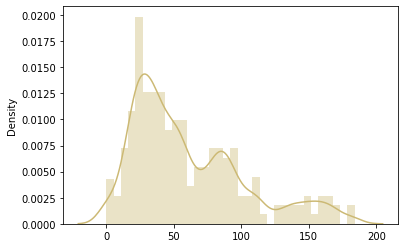

In [20]:
# Lav sådan et hvor vi har kvinders karakterer og mænds karakterer
#  kvindernes overordede gennemsnits karakterer
sns.set_color_codes()
ax = sns.distplot(df_GENDER_ENG_PRO, color="y")

In [34]:
# subs_per_day = wallstreet_subs.groupby("created_date", as_index=False).aggregate(["sum"])


In [35]:
# Distribution of men and women 
# group by gender and university?

12411

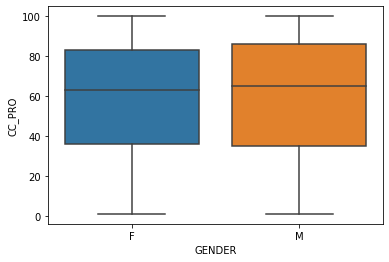

In [36]:
# Import seaborn
import seaborn as sns



# Create a visualization
sns.boxplot(
    data=df,
    x="GENDER", y="CC_PRO"
)
df.GENDER.count()

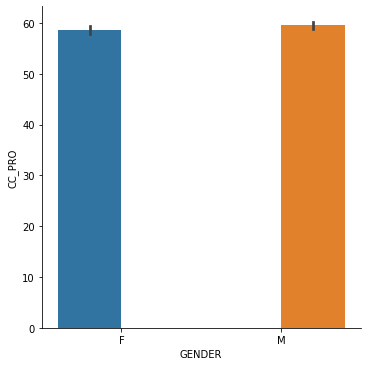

In [37]:
sns.catplot(data=df, kind="bar", x="GENDER", y="CC_PRO", hue="GENDER")

In [14]:
dff

,Unnamed: 0,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,...,71,93,79,181,180,91,5,4,2,2
1,1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,...,86,98,78,201,182,92,5,4,4,4
2,2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,...,18,43,22,113,113,7,1,1,1,1
3,3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,...,76,80,48,137,157,67,4,3,2,2
4,4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,...,98,100,71,189,198,98,5,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,SB11201420568705,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,...,86,87,65,142,176,88,5,4,2,2
12407,12407,SB11201420573045,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,...,44,11,0,127,107,4,1,1,4,2
12408,12408,SB11201420578809,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,...,90,81,87,192,188,95,5,4,2,2
12409,12409,SB11201420578812,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,...,51,8,42,121,146,50,3,3,3,2
